In [1]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
folder_path = 'Crop_Disease/Corn'


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    seed=123,
    shuffle=True,
    image_size=(255,255),
    batch_size=32
)


Found 3852 files belonging to 4 classes.


In [4]:

class_names = dataset.class_names
class_names

['Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Northern_Leaf_Blight']

In [5]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:


# Check if the dataset is empty
print("Number of batches:", tf.data.experimental.cardinality(dataset).numpy())

# Iterate through the dataset
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

Number of batches: 121
(32, 255, 255, 3)
[1 1 2 3 0 3 3 3 3 2 3 0 0 3 0 0 3 2 1 2 0 2 2 1 3 3 2 2 0 0 0 3]


In [7]:
class_name= dataset.class_names
class_name

['Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Northern_Leaf_Blight']

In [8]:
len(dataset)

121

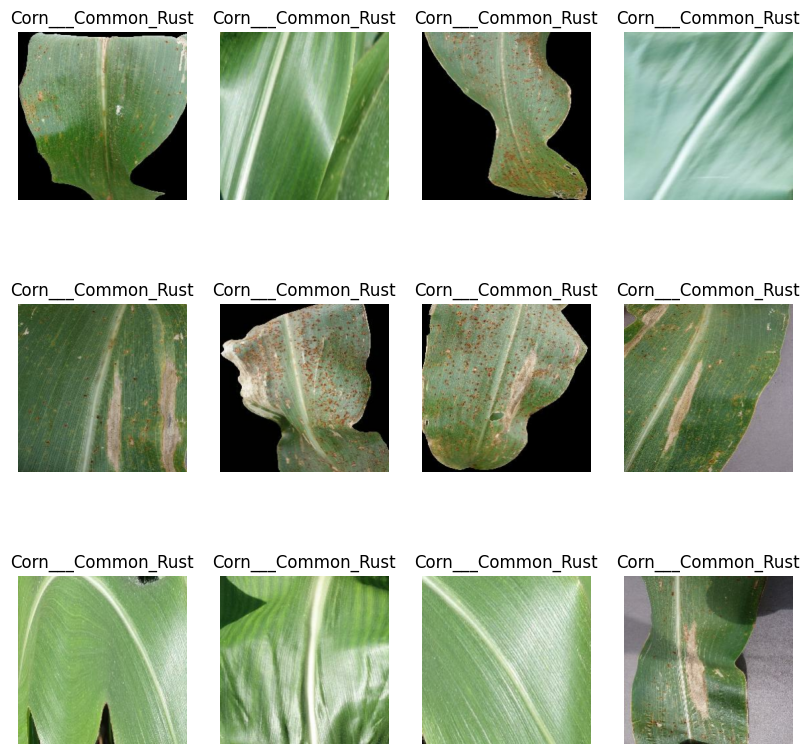

In [9]:
plt.figure(figsize=(10,10))
for images1 , labels1 in  dataset.take(1) :
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images1[i].numpy().astype('int'))
        plt.axis('off')
        plt.title(class_name[labels1[i].numpy().argmax()])  

In [10]:
train_data=dataset.take(100)
len(train_data)

100

In [11]:
test_data=dataset.skip(100)
len(test_data)

21

In [12]:
val_ds = test_data.take(10)
len(val_ds)

10

In [13]:
test_ds = test_data.skip(10)
len(test_data)
print(len(list(test_ds)))

11


In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    print(ds_size)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

121


In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(255, 255),
    layers.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [25]:
n_classes = 4
input_shape = (255, 255, 3)  # Remove batch size

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define input shape
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [23]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=20, 
)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9324 - loss: 0.1565 - val_accuracy: 0.9323 - val_loss: 0.1700
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 957ms/step - accuracy: 0.9435 - loss: 0.1510 - val_accuracy: 0.9141 - val_loss: 0.2625
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 920ms/step - accuracy: 0.9235 - loss: 0.1892 - val_accuracy: 0.9297 - val_loss: 0.1469
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 922ms/step - accuracy: 0.9332 - loss: 0.1483 - val_accuracy: 0.9401 - val_loss: 0.1297
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 955ms/step - accuracy: 0.9569 - loss: 0.1147 - val_accuracy: 0.9479 - val_loss: 0.1278
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 925ms/step - accuracy: 0.9460 - loss: 0.1515 - val_accuracy: 0.9531 - val_loss: 0.1542
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 89s 912ms/step - accuracy: 0.9496 - loss: 0.1268 - val_accuracy: 0.9583 - val_loss: 0.1157
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 933ms/step - accuracy: 0.9462 - loss: 0.1287 - val_accura

In [29]:
scores = model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.9112 - loss: 0.2403


In [30]:
scores

[0.21601834893226624, 0.9254807829856873]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 96}

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
print(len(acc), len(val_acc))  # Check lengths
print(len(loss), len(val_loss))  # Check lengths


20 20
20 20


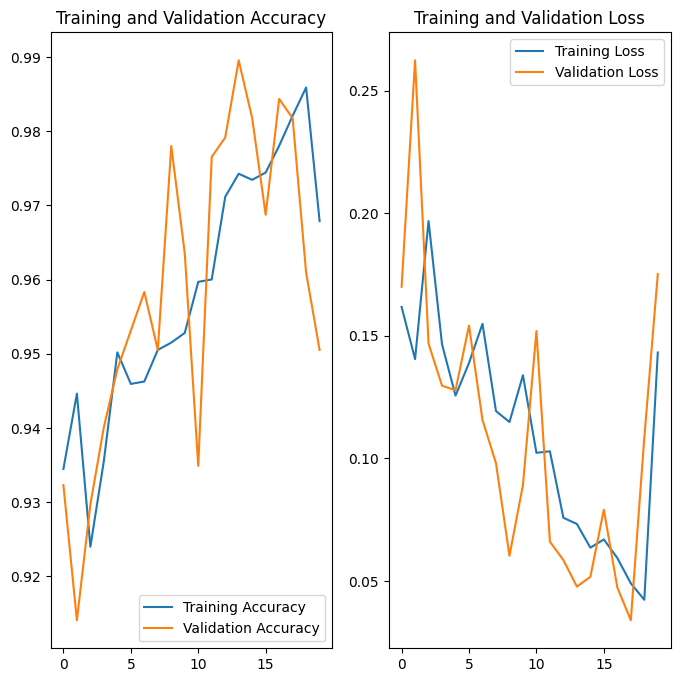

In [37]:
epochs = len(acc)  # or len(val_acc), since both are 20

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [39]:
model.save("corn.h5")


In [40]:
from PIL import Image
import numpy as np
image_path = "Crop_Disease\Corn\Corn___Gray_Leaf_Spot\image (2).JPG" 
image = Image.open(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions=model.predict(img_array)

predictions

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10464\940263806.py:3: SyntaxWarning: invalid escape sequence '\C'
  image_path = "Crop_Disease\Corn\Corn___Gray_Leaf_Spot\image (2).JPG"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


array([[2.0632368e-07, 9.8948532e-01, 3.2276853e-06, 1.0511272e-02]],
      dtype=float32)

In [41]:
predicted_class = class_names[np.argmax(predictions)]
print (predicted_class)
print (np.max(predictions))

Corn___Gray_Leaf_Spot
0.9894853


In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


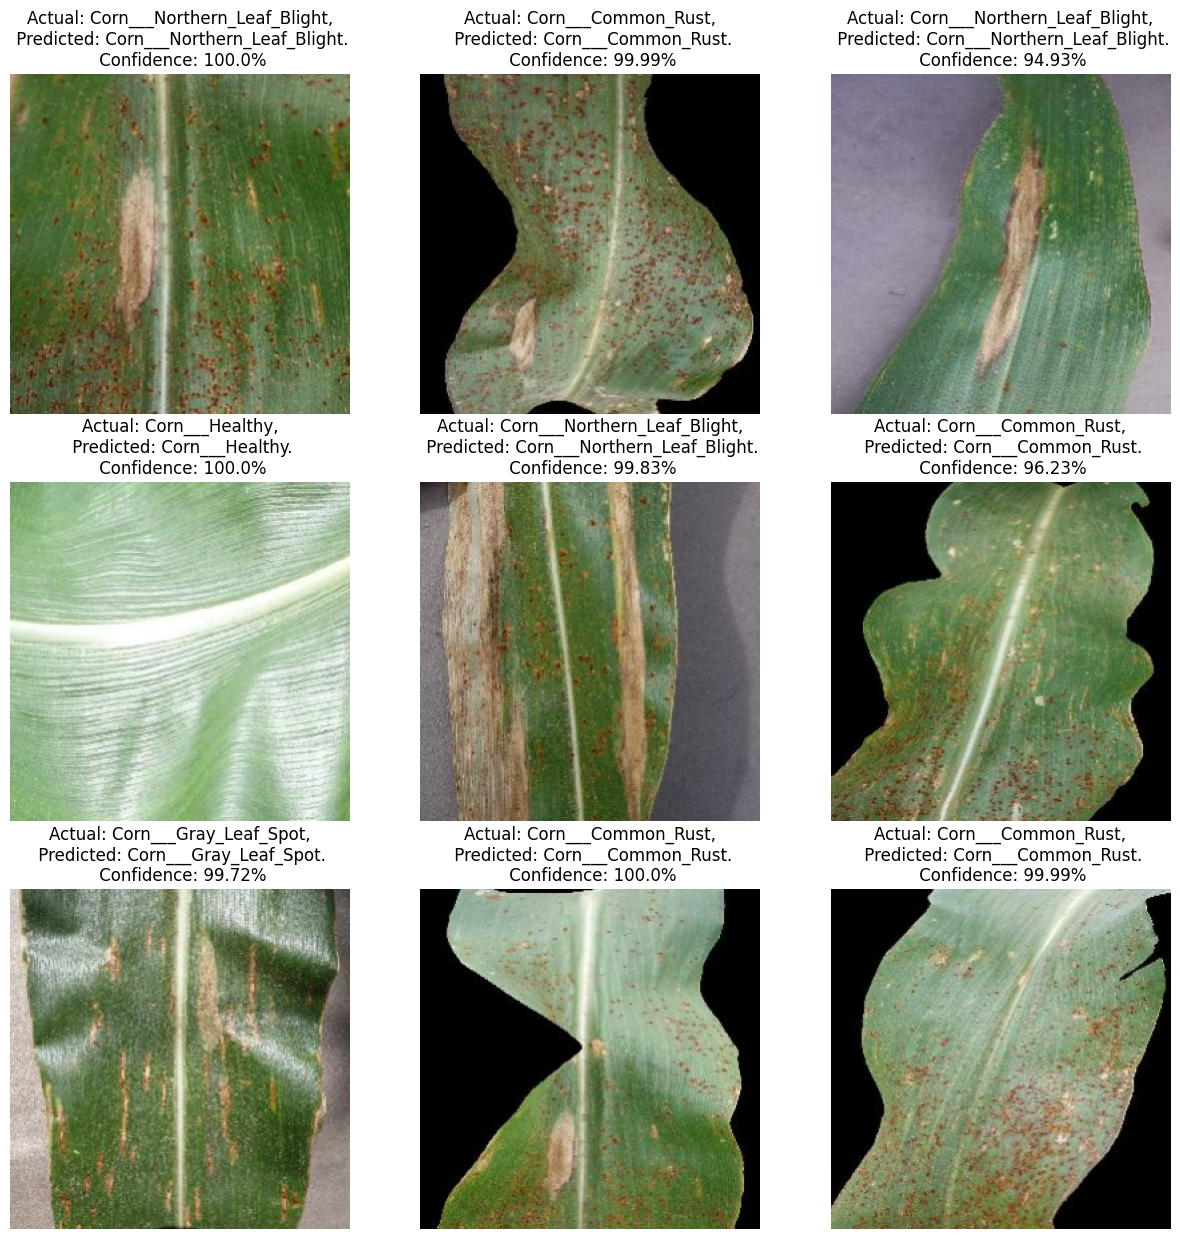

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")